<a href="https://colab.research.google.com/github/aiswaryapaul/Drug-Classification-using-SVM/blob/main/drug_svmclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Build a ML model using SVM  classifier.
2. EDA - null, duplicate, outlier
3. Label Encoding
4. Split data into idependent and target features
5. Split data into training and testing
6. Fit the data into model
7. Predict on test data
8. Check accuracy

*Target* - Drug

In [ ]:
from sklearn.svm import SVC #Support Vector Classifier

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/drug.csv')

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
df.duplicated().sum()

np.int64(0)

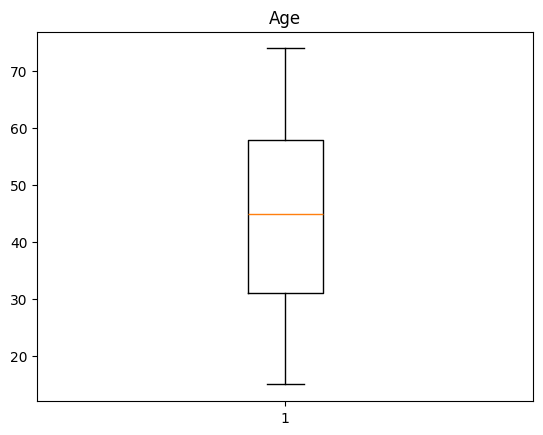

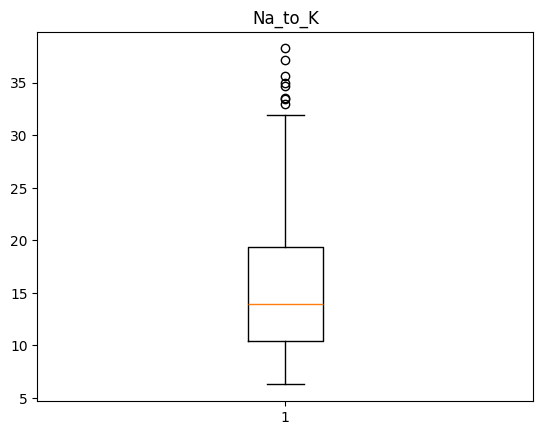

In [ ]:
for i in df.select_dtypes(exclude = 'object'):
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

In [ ]:
q1 = df['Na_to_K'].quantile(0.25)
q3 = df['Na_to_K'].quantile(0.75)
iqr = q3 - q1
ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr
df = df[(df['Na_to_K']>ll) & (df['Na_to_K']<ul)]

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
for i in df.columns:
  if df[i].dtype =='object':
    df[i] = le.fit_transform(df[i])

/tmp/ipython-input-10-430956245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
/tmp/ipython-input-10-430956245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
/tmp/ipython-input-10-430956245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [ ]:
x = df.drop('Drug',axis = 1)
y = df['Drug']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel = 'poly')

In [ ]:
model.fit(x_train,y_train)

SVC(kernel='poly')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 0, 4, 0, 0, 4, 4, 4, 4, 0, 0, 0, 4, 4, 4, 4])

In [ ]:
from sklearn.metrics import *

In [ ]:
print(accuracy_score(y_test,y_pred))

0.6153846153846154


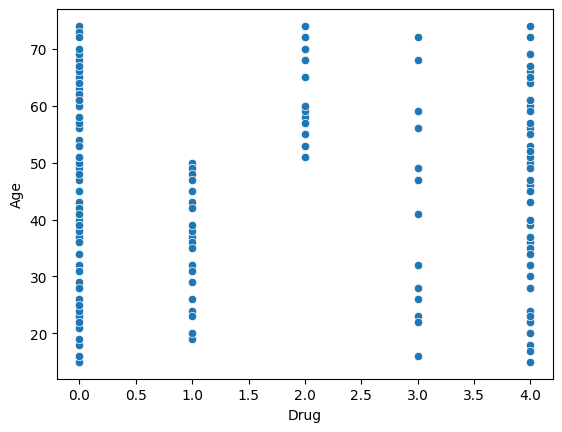

In [ ]:
sns.scatterplot(data = df,x = 'Drug',y = 'Age')
plt.show()